<a href="https://colab.research.google.com/github/therealfortune/DA-Portfolio-Project/blob/master/MLR_movies_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import pandas as pd 
import seaborn as sns
import numpy as np 

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [58]:
pd.set_option('display.max_rows', None)

In [59]:
df = pd.read_csv('/content/movies.csv')
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


Checking for missing data

In [60]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} ---> {}'.format(col, round(pct_missing)))

name ---> 0
rating ---> 0
genre ---> 0
year ---> 0
released ---> 0
score ---> 0
votes ---> 0
director ---> 0
writer ---> 0
star ---> 0
country ---> 0
budget ---> 0
gross ---> 0
company ---> 0
runtime ---> 0


In [65]:
df = df[~df['votes'].isnull()]
df = df[~df['budget'].isnull()]
df = df[~df['gross'].isnull()]
df = df[~df['runtime'].isnull()]
df = df[~df['company'].isnull()]

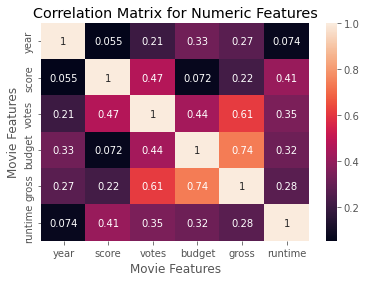

In [66]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

Looking at this heatmap , we can deduce that budget, votes, runtime ,score and year is correlated to gross

In [67]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

Converting Float datatype to Integers

In [68]:
df2 = df

for col_name in df2.columns:
  if(df2[col_name].dtype == 'float64'):
    df2[col_name] = df2[col_name].astype('int')
df2.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104


Converting objects datatypes to categorical data type

In [69]:
for col_name in df2.columns:
  if df2[col_name].dtype == 'object':
    df2[col_name] = df2[col_name].astype('category').cat.codes
df2.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,4703,6,6,1980,1308,8,927000,1798,2839,700,46,19000000,46998772,1432,146
1,3940,6,1,1980,1131,5,65000,1580,1159,215,47,4500000,58853106,454,104


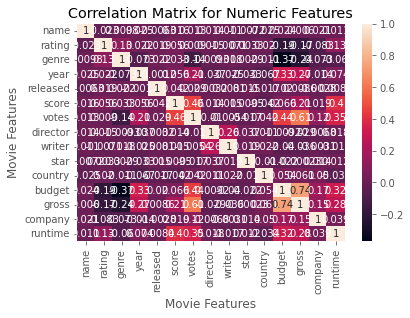

In [70]:
correlation_matrix = df2.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

knowing that budget , votes , runtime , year and score has correlation with gross, let us check the correlation between other columns

In [71]:
cor1 = df2.gross.corr(df2.name)
cor2 = df2.gross.corr(df2.rating)
cor3 = df2.gross.corr(df2.genre)
cor4 = df2.gross.corr(df2.released)
cor5 = df2.gross.corr(df2.country)
cor6 = df2.gross.corr(df2.company)

print(f'name: {cor1}, \n rating: {cor2}, \n genre: {cor3} \n released: {cor4}, \n country: {cor5}, \n company: {cor6} ')

name: 0.005992226401849058, 
 rating: -0.16910694536943108, 
 genre: -0.24444625153086538 
 released: 0.00862317518252741, 
 country: 0.061025358279074855, 
 company: 0.14994348311873007 


Dropping other columns in the movie data set due to their low statistical signicance, We are dropping all columns except year, budget, votes, score, budget , company and gross

In [72]:
df2 = df2.drop(columns="name")
df2 = df2.drop(columns="rating")
df2 = df2.drop(columns="genre")
df2 = df2.drop(columns="released")
df2 = df2.drop(columns="country")
df2 = df2.drop(columns="director")
df2 = df2.drop(columns="writer")
df2 = df2.drop(columns="runtime")

In [73]:
df2.head()

,year,score,votes,star,budget,gross,company
0,1980,8,927000,700,19000000,46998772,1432
1,1980,5,65000,215,4500000,58853106,454
2,1980,8,1200000,1161,18000000,538375067,949
3,1980,7,221000,1478,3500000,83453539,1114
4,1980,7,108000,272,6000000,39846344,1089


Moving the Gross column to the last column to make it easier to split our data for multiple linear regression

In [88]:
last_col = df2.pop('gross')

In [91]:
df2.insert(6, 'gross', last_col)

In [93]:
df2.head()

,year,score,votes,star,budget,company,gross
0,1980,8,927000,700,19000000,1432,46998772
1,1980,5,65000,215,4500000,454,58853106
2,1980,8,1200000,1161,18000000,949,538375067
3,1980,7,221000,1478,3500000,1114,83453539
4,1980,7,108000,272,6000000,1089,39846344


Splitting the data into X and Y

In [95]:
x = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

In [102]:
x.shape

(5433, 6)

In [101]:
y.shape

(5433,)

Splitting the data into Training and Testing set

In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

Training the multiple linear Regression model on the Training set

In [103]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [104]:
y_pred = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[58777924.   32917353.  ]
 [-4010298.03  4884663.  ]
 [16030617.12  2300684.  ]
 ...
 [30000290.25 52487045.  ]
 [28675255.38 22939027.  ]
 [-5001096.72  2847941.  ]]
